In [44]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df = pd.read_csv('ams12.csv')
df.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,HgYmin,HgXmax,HgYmax,Intersection,Included_Center,Intersection_Area,Hg_Area,Distance,Ground_Truth,GT
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,176.115577,425.699604,203.980340,Center_left,1,844.925198,881.508223,136.120892,0,MLP
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,176.050999,425.668627,203.878841,Center_left,1,848.952861,892.193796,136.317231,0,MLP
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,175.932056,425.627609,203.722820,Center_left,1,837.705837,890.243298,136.384041,0,MLP
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,177.653896,423.709709,202.787083,Center_left,1,613.789372,763.579688,136.939795,0,MLP
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,177.582060,423.771116,202.885134,Center_left,1,611.643926,767.067283,136.847188,0,MLP


In [46]:
len(df)

18462

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18462 entries, 0 to 18461
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              18462 non-null  int64  
 1   N_Person           18462 non-null  int64  
 2   Xcenter            18462 non-null  float64
 3   Ycenter            18462 non-null  float64
 4   PerXmin            18462 non-null  float64
 5   PerYmin            18462 non-null  float64
 6   PerXmax            18462 non-null  float64
 7   PerYmax            18462 non-null  float64
 8   N_Handgun          18462 non-null  int64  
 9   HgXcenter          18462 non-null  float64
 10  HgYcenter          18462 non-null  float64
 11  HgXmin             18462 non-null  float64
 12  HgYmin             18462 non-null  float64
 13  HgXmax             18462 non-null  float64
 14  HgYmax             18462 non-null  float64
 15  Intersection       18462 non-null  object 
 16  Included_Center    184

In [48]:
df.nunique()

Frame                 1933
N_Person                 5
Xcenter              14218
Ycenter              14199
PerXmin              14226
PerYmin              14223
PerXmax              14226
PerYmax              14203
N_Handgun                5
HgXcenter             7301
HgYcenter             7299
HgXmin                7303
HgYmin                7303
HgXmax                7303
HgYmax                7302
Intersection             9
Included_Center          2
Intersection_Area     8433
Hg_Area               7303
Distance             18462
Ground_Truth             2
GT                       2
dtype: int64

In [49]:
df['Ground_Truth'].value_counts()

0    17486
1      976
Name: Ground_Truth, dtype: int64

In [50]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,GT,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,MLP,1,0,0,0,0,0,0,0,0
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,MLP,1,0,0,0,0,0,0,0,0
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,MLP,1,0,0,0,0,0,0,0,0
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,MLP,1,0,0,0,0,0,0,0,0
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,MLP,1,0,0,0,0,0,0,0,0


In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18462 entries, 0 to 18461
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18462 non-null  int64  
 1   N_Person                      18462 non-null  int64  
 2   Xcenter                       18462 non-null  float64
 3   Ycenter                       18462 non-null  float64
 4   PerXmin                       18462 non-null  float64
 5   PerYmin                       18462 non-null  float64
 6   PerXmax                       18462 non-null  float64
 7   PerYmax                       18462 non-null  float64
 8   N_Handgun                     18462 non-null  int64  
 9   HgXcenter                     18462 non-null  float64
 10  HgYcenter                     18462 non-null  float64
 11  HgXmin                        18462 non-null  float64
 12  HgYmin                        18462 non-null  float64
 13  H

# Random Forest 
## Todos los predictores

In [52]:
pred = dict(zip(df2.Ground_Truth.unique(),df2.GT.unique()))
print(pred)

{0: 'MLP', 1: 'SVM'}


In [53]:
print(df2['Ground_Truth'].value_counts())

0    17486
1      976
Name: Ground_Truth, dtype: int64


In [54]:
df3 = df2.drop(columns=["GT"])

In [55]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18462 entries, 0 to 18461
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18462 non-null  int64  
 1   N_Person                      18462 non-null  int64  
 2   Xcenter                       18462 non-null  float64
 3   Ycenter                       18462 non-null  float64
 4   PerXmin                       18462 non-null  float64
 5   PerYmin                       18462 non-null  float64
 6   PerXmax                       18462 non-null  float64
 7   PerYmax                       18462 non-null  float64
 8   N_Handgun                     18462 non-null  int64  
 9   HgXcenter                     18462 non-null  float64
 10  HgYcenter                     18462 non-null  float64
 11  HgXmin                        18462 non-null  float64
 12  HgYmin                        18462 non-null  float64
 13  H

In [56]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test, y_test = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14769, 28) (14769,)
(3693, 28) (3693,)


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.9667246250557954
mean_test =  0.9660097098601316


,fit_time,score_time,test_score,train_score
0,0.149735,0.003989,0.970210,0.965017
1,0.116688,0.002992,0.967502,0.968101
2,0.115691,0.002992,0.968179,0.969230
3,0.119673,0.004988,0.967502,0.966822
4,0.123458,0.003978,0.966148,0.965995
5,0.124618,0.004016,0.964794,0.969907
6,0.134616,0.004940,0.962762,0.963738
7,0.122334,0.003996,0.964116,0.969531
8,0.124292,0.006604,0.965471,0.966070
9,0.131238,0.006014,0.963415,0.962838


                         feature  importance       std
27         Intersection_Up_right    0.000000  0.000000
1                       N_Person    0.000000  0.000000
22        Intersection_Down_left    0.000000  0.000000
21      Intersection_Down_center    0.000000  0.000000
8                      N_Handgun    0.000000  0.000000
26          Intersection_Up_left    0.000000  0.000000
25        Intersection_Up_center    0.000012  0.000035
19      Intersection_Center_left    0.000932  0.002724
11                        HgXmin    0.001712  0.002815
2                        Xcenter    0.003503  0.010510
15               Included_Center    0.006083  0.014936
16             Intersection_Area    0.018131  0.032269
14                        HgYmax    0.025195  0.040827
13                        HgXmax    0.025373  0.051440
24  Intersection_No_intersection    0.025545  0.056902
9                      HgXcenter    0.033364  0.054181
4                        PerXmin    0.034293  0.048416
7         

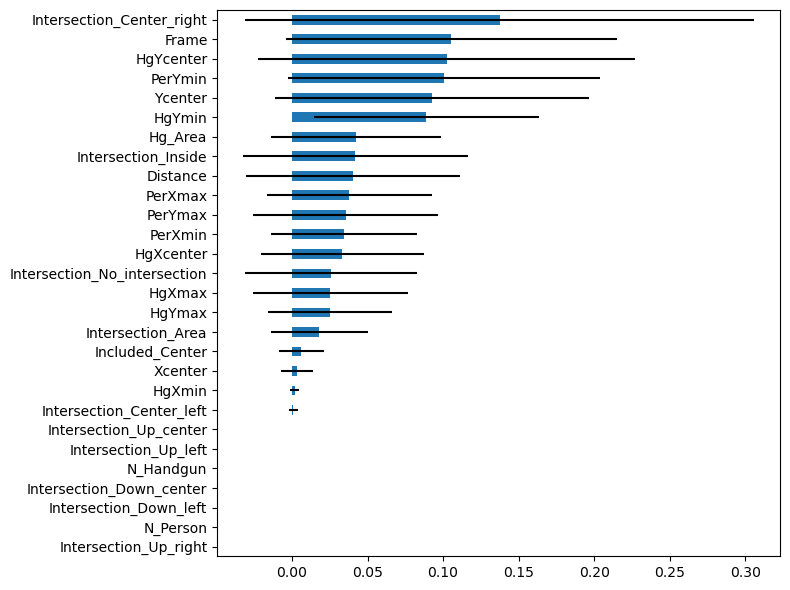

In [59]:
clf.fit(X_train.values, y_train.values)
predictions=clf.predict(X_test.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3491
           1       1.00      0.33      0.50       202

    accuracy                           0.96      3693
   macro avg       0.98      0.67      0.74      3693
weighted avg       0.96      0.96      0.95      3693



In [61]:
from sklearn.metrics import accuracy_score
print("Score test = ", accuracy_score(y_test,predictions))

Score train =  0.9634443541835905


In [62]:
from sklearn.metrics import precision_score
precision_score(y_test,predictions, average='macro')

0.9813844456701599

In [63]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions, average='macro')

0.6658415841584159

In [64]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions, average='macro')

0.7395862986837631

In [18]:
# save the model to disk
filename = 'rfc_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

# Redes Neuronales - Todos los predictores

In [19]:
X = df3.drop('Ground_Truth',axis='columns')
y = df3.Ground_Truth

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18462 entries, 0 to 18461
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18462 non-null  int64  
 1   N_Person                      18462 non-null  int64  
 2   Xcenter                       18462 non-null  float64
 3   Ycenter                       18462 non-null  float64
 4   PerXmin                       18462 non-null  float64
 5   PerYmin                       18462 non-null  float64
 6   PerXmax                       18462 non-null  float64
 7   PerYmax                       18462 non-null  float64
 8   N_Handgun                     18462 non-null  int64  
 9   HgXcenter                     18462 non-null  float64
 10  HgYcenter                     18462 non-null  float64
 11  HgXmin                        18462 non-null  float64
 12  HgYmin                        18462 non-null  float64
 13  H

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-1.86663419, -1.00701402,  0.38577429, -1.0576382 ,  0.40687684,
        -0.80172085,  0.34908455, -1.42438868, -0.49745242,  0.64909231,
        -1.2576171 ,  0.70164169, -1.17662884,  0.59512758, -1.33394055,
         1.17579801, -0.04954292, -0.63157767, -0.69785319,  2.6667582 ,
        -0.28065267, -0.01645904, -0.01040876, -0.53932218, -1.08661074,
        -0.1197492 , -0.06169281, -0.13779203],
       [-1.86446317, -1.00701402,  0.3854888 , -1.05704832,  0.40589548,
        -0.80003247,  0.34952983, -1.42713307, -0.49745242,  0.64749709,
        -1.25847055,  0.69864005, -1.17727962,  0.59492659, -1.33499858,
         1.17579801, -0.04712076, -0.62566511, -0.69642536,  2.6667582 ,
        -0.28065267, -0.01645904, -0.01040876, -0.53932218, -1.08661074,
        -0.1197492 , -0.06169281, -0.13779203],
       [-1.86229216, -1.00701402,  0.3861088 , -1.05920044,  0.40736329,
        -0.80408525,  0.34924902, -1.42312783, -0.49745242,  0.64731849,
        -1.25988355,  0.6985

In [22]:
print(scaler.mean_)

[8.59798234e+02 8.80240494e-01 3.93102559e+02 3.82411389e+02
 3.05846217e+02 2.46139494e+02 4.80358901e+02 5.18683283e+02
 2.99046690e-01 3.10616438e+02 3.12410896e+02 2.87253787e+02
 2.92873459e+02 3.33979089e+02 3.31948332e+02 4.19727007e-01
 9.27307239e+02 2.02293700e+03 2.32081730e+02 1.23280251e-01
 7.30148413e-02 2.70826563e-04 1.08330625e-04 2.25327700e-01
 5.41436464e-01 1.41371466e-02 3.79157188e-03 1.86328675e-02]


In [23]:
print(scaler.scale_)

[4.60614212e+02 8.74109471e-01 2.12292249e+02 6.88595037e+01
 2.20044556e+02 1.11930192e+02 2.12735709e+02 3.92590281e+01
 6.01156363e-01 1.52929789e+02 9.72974500e+01 1.52229531e+02
 9.92308523e+01 1.54119080e+02 9.59323050e+01 4.93514181e-01
 1.66284199e+03 1.80726587e+03 1.37508632e+02 3.28758621e-01
 2.60160862e-01 1.64545804e-02 1.04076361e-02 4.17797951e-01
 4.98280061e-01 1.18056290e-01 6.14588957e-02 1.35224568e-01]


In [24]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [25]:
X_train.shape

(13846, 28)

In [26]:
y_train.value_counts()

0    13114
1      732
Name: Ground_Truth, dtype: int64

In [27]:
X_test.shape

(4616, 28)

In [28]:
y_test.value_counts()

0    4372
1     244
Name: Ground_Truth, dtype: int64

In [29]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=0, tol=0.000000001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
predictions_mlp=clf.predict_proba(X_test)
predictions_mlp

array([[1.00000000e+00, 1.04476645e-11],
       [9.99999432e-01, 5.67613123e-07],
       [9.99999884e-01, 1.15832645e-07],
       ...,
       [9.99947916e-01, 5.20844046e-05],
       [7.83919887e-01, 2.16080113e-01],
       [9.99999992e-01, 7.71975817e-09]])

In [30]:
predictions_mlp=clf.predict(X_test)
predictions_mlp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4372
           1       0.92      0.92      0.92       244

    accuracy                           0.99      4616
   macro avg       0.96      0.96      0.96      4616
weighted avg       0.99      0.99      0.99      4616



In [33]:
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9959555106167847
Score test =  0.9917677642980935


In [40]:
from sklearn.metrics import accuracy_score
print("Score test = ", accuracy_score(y_test,predictions_mlp))

Score train =  0.9917677642980935


In [41]:
from sklearn.metrics import precision_score
precision_score(y_test,predictions_mlp, average='macro')

0.9588926551977561

In [42]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions_mlp, average='macro')

0.9588926551977561

In [43]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions_mlp, average='macro')

0.9588926551977561

In [34]:
# save the model to disk
filename = 'mlp_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 